In [1]:
import pandas as pd

fname = '../../datasets/tiingo_tweets/all_tweets_headlines_17844.csv'  

df = pd.read_csv(fname)

print('\nshape = ',df.shape)

df.dropna(axis=0,how='any',inplace=True)

print('\nshape = ',df.shape)

print('\n',df.dtypes)

df['senti'] = df['senti'].astype('category')

print('\n',df.dtypes)

print('\n\tdf.shape = ',df.shape)

df.head()


shape =  (17844, 2)

shape =  (17844, 2)

 text     object
senti     int64
dtype: object

 text       object
senti    category
dtype: object

	df.shape =  (17844, 2)


,text,senti
0,$3.98 Billion in Sales Expected for Jacobs Eng...,1
1,"Operating result , excluding one-off items , t...",-1
2,"great app, better than Google's free one. but ...",0
3,said trump polit dive market spi nk,-1
4,qqq spi iwm spx rut,-1


In [2]:
print(df.index.is_unique)

if not df.index.is_unique:
 print('\nResetting')   
 df.reset_index(drop=True,inplace=True)
 print(df.index.is_unique)

df[df.index.duplicated(keep=False)]

True


,text,senti


  1    5948
 0    5948
-1    5948
Name: senti, dtype: int64

	df.shape =  (17844, 2)


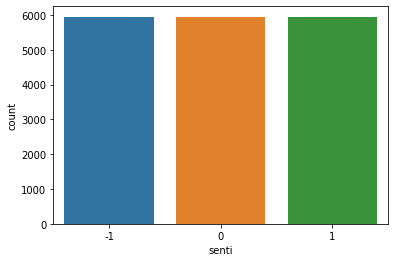

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print('',df['senti'].value_counts())

plt.figure(1)
sns.countplot(df.senti)

print('\n\tdf.shape = ',df.shape)

plt.show()

In [4]:
import text_clean as tc
import importlib
importlib.reload(tc)

cond = df['text'].apply(lambda x : tc.count_cashtags(x) > 5)

cond.shape


Entered*** 

Entered*** 


(17844,)

In [5]:
df.drop(index=df[cond].index,inplace=True)

print(df.shape)

(17627, 2)


In [6]:
cond2 = df['text'].apply(lambda x : tc.count_cashtags(x) > 5)

print(cond2.shape)

cond2.value_counts()

(17627,)


False    17627
Name: text, dtype: int64

In [7]:
nrows = df.shape[0]
print('\nnrows = ',nrows)

df['tidy_text'] = df['text'].apply(lambda x : tc.clean_emoji_url(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_hashtag(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_cashtag(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_mention(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.replace_chars(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.normalize_doc(x))

print('\nDone cleaning')


nrows =  17627

Done cleaning


In [8]:
print(df.columns)

cond = df['tidy_text'].apply(lambda x : tc.count_toks(x) == 0)

print(cond.shape)
cond.value_counts()

Index(['text', 'senti', 'tidy_text'], dtype='object')
(17627,)


False    17506
True       121
Name: tidy_text, dtype: int64

In [9]:
df.drop(index=df[cond].index,inplace=True)

print(df.shape)

(17506, 3)


In [10]:
cond2 = df['tidy_text'].apply(lambda x : tc.count_toks(x) == 0)

print(cond2.shape)

cond2.value_counts()

(17506,)


False    17506
Name: tidy_text, dtype: int64

  0    5845
-1    5833
 1    5828
Name: senti, dtype: int64


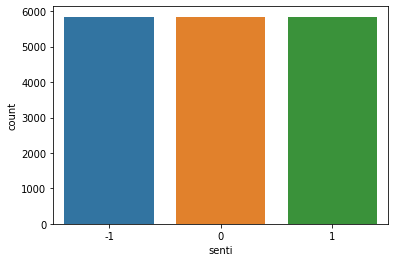

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

print('',df['senti'].value_counts())

plt.figure(1)
sns.countplot(df.senti)

plt.show()

In [13]:
from sklearn import model_selection
import numpy as np

# split the dataset into training and validation datasets 
#train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tidy_text'], df['senti'],test_size=0.03,\
#                                                                      random_state=123,stratify=df['senti'])
#train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tidy_text'], df['senti'])

train_x = df['tidy_text']
train_y = df['senti']

#print('\n',isinstance(train_x,list))
print('\n',type(train_x))
print('\n',type(train_y))
#print('\n',type(valid_x))
#print('\n',type(valid_y))
print('\n',type(df['tidy_text']))
print('\n',type(df['senti']))

print('\nshape = ',np.shape(train_x))
print('shape = ',np.shape(train_y))

#print('\n',train_x.iloc[0],train_y.iloc[0])
#print('\n',train_x.iloc[3],train_y.iloc[3])


 <class 'pandas.core.series.Series'>

 <class 'pandas.core.series.Series'>

 <class 'pandas.core.series.Series'>

 <class 'pandas.core.series.Series'>

shape =  (17506,)
shape =  (17506,)


<Figure size 432x288 with 0 Axes>

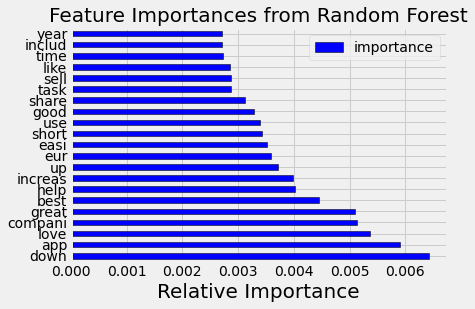

In [16]:
#Feature importance
classifier = ensemble.RandomForestClassifier()
classifier.fit(xtrain_count, train_y)

importances = classifier.feature_importances_

#print('\n importances = \n',importances)

feature_results = pd.DataFrame({'feature': featnm, 
                                'importance': importances})
#feature_results.head(5)

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
#print(feature_results.head(5))

plt.figure(1)
plt.style.use('fivethirtyeight')
# Plot the 20 most important features in a horizontal bar chart
feature_results.loc[:20, :].plot(x = 'feature', y = 'importance',edgecolor = 'k',kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 20);




----topx =  100
shape =  (17506, 100)

----topx =  1000
shape =  (17506, 1000)

----topx =  2000
shape =  (17506, 2000)

----topx =  4000
shape =  (17506, 4000)

----topx =  8000
shape =  (17506, 8000)

----topx =  12950
shape =  (17506, 12950)


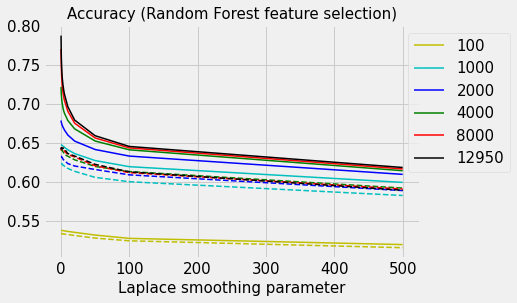

In [30]:
importlib.reload(ML)
import ML_methods as ML

topn = [100, 1000, 2000, 4000, 8000, num_features]

nf = len(topn)

check_params = {'alpha': [0.1, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0,50.0,100.0,500.0]}
refit_score = 'accuracy_score'

npar = len(check_params['alpha'])

trainarr = np.empty([nf,npar])
testarr  = np.empty([nf,npar])

i=0
for topx in topn:
   print('\n----topx = ',topx) 
   most_important = feature_results['feature'][0:topx]
   indices = [featnm.index(x) for x in most_important]
   xtrain_red = xtrain_count[:,indices]
   print('shape = ',np.shape(xtrain_red))
   bestmodel, res = ML.grid_search_wrapper(naive_bayes.MultinomialNB(),
                                            xtrain_red, train_y,
                                            check_params, refit_score)
   trainarr[i,:] =  res['mean_train_score']
   testarr[i,:]  =  res['mean_test_score']
   i += 1

traincl = ['y','c','b','g','r','k']

hd=[]

plt.figure(1)
for i in np.arange(nf):
 h1,=plt.plot(check_params['alpha'],trainarr[i,:], color=traincl[i], lw=1.5); hd.append(h1)
 plt.plot(check_params['alpha'],testarr[i,:], color=traincl[i],linestyle='--',lw=1.5)
plt.legend(hd,topn,fontsize=15,bbox_to_anchor=(0.95,1.0))
plt.grid(True); plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.title('Accuracy (Random Forest feature selection)',fontsize=15)
plt.xlabel('Laplace smoothing parameter',fontsize=15)
plt.savefig('figs/RF_featureselect_laplace.png', bbox_inches = 'tight')


plt.show()    


